#Assignment for Data QA & QC Internship @ Datahut
###By : Pillai Athira Sadashivan


A dataset named messy_Data.csv has been provided. The task is to
clean this dataset and ensure it is ready for analysis

Import Libraries

In [ ]:
import pandas as pd
import numpy as np


Reading Data

In [ ]:
df = pd.read_csv("/content/sample_data/messy_data.csv")
df.head()

,Unnamed: 0,ID,Name,Age,Email,Join Date,Salary,Department
0,0,1e407ff9-6255-489d-a0de-34135d4f74bd,Hunter Thomas,25.0,xlopez@hotmail.com,NaN,88552.0,Sales
1,1,379f55b8-87d5-4739-a146-7400b78c24d1,Jeremy Irwin,90.0,Jillian Jenkins,2022-07-07,139227.0,NaN
2,2,18261368-dfa1-47f0-afc6-bddf45926b07,Jennifer Hammondquickly,66.0,jscottgreen.biz,2023-11-21,65550.0,Engineering
3,3,ae7cf7cf-17cf-4c8b-9c44-4f61a9a238e5,Sydney Taylorso,39.0,luke56gonzalez.com,2021-11-05,139932.0,SupportJ
4,4,14ed3e6a-e0f5-4bbe-8d93-8665267f5c90,Julia Lee,71.0,figueroakayla@yahoo.com,NaN,143456.0,Marketing


In [ ]:
df.describe()


,Unnamed: 0,Age,Salary
count,11000.000000,9253.000000,8761.000000
mean,5012.947818,54.162650,89886.585012
std,2884.739158,21.072919,34896.320117
min,0.000000,18.000000,24655.136613
25%,2509.750000,36.000000,59723.844874
50%,5024.500000,54.000000,89241.000000
75%,7510.250000,72.000000,119491.000000
max,9999.000000,90.000000,176156.206747


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  11000 non-null  int64  
 1   ID          11000 non-null  object 
 2   Name        8667 non-null   object 
 3   Age         9253 non-null   float64
 4   Email       9731 non-null   object 
 5   Join Date   8808 non-null   object 
 6   Salary      8761 non-null   float64
 7   Department  8745 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 687.6+ KB


Find Missing Values


In [ ]:
missing_values_count = df.isnull().sum()
missing_values_count[0:8]


Unnamed: 0       0
ID               0
Name          2333
Age           1747
Email         1269
Join Date     2192
Salary        2239
Department    2255
dtype: int64

In [ ]:
# how many total missing values do we have?
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
(total_missing/total_cells) * 100

13.676136363636363

<Axes: >

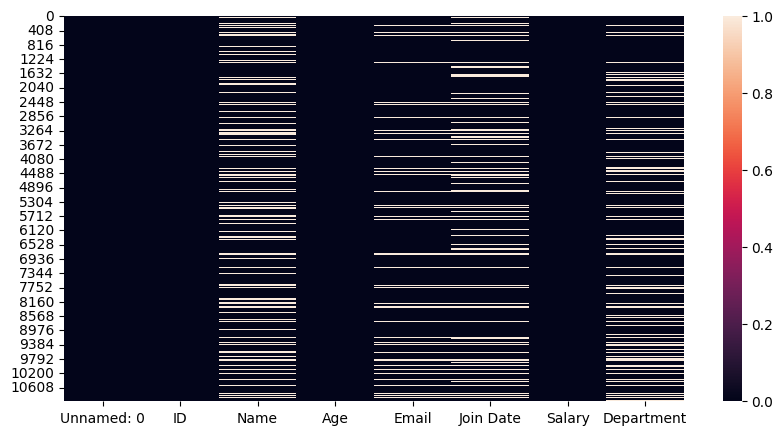

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
cols = df.columns

#plot a heatmap of missing values with seaborn
plt.figure(figsize = (10,5))
sns.heatmap(df[cols].isnull())

Fill missing values with appropriate values (e.g., mean, median)

In [ ]:

df['Age'].value_counts()
print(df['Age'].head())

# Checking for missing values in the age column
print(df['Age'].isnull().sum())

# Filling missing values with the mean
df['Age'].fillna(df['Age'].mean(), inplace=True)

# Defining valid age range
min_age = 0
max_age = 100

# Removing invalid age values
df = df[(df['Age'] >= min_age) & (df['Age'] <= max_age)]

df['Age']

# Remove values after the decimal points in the Age column
df['Age'] = df['Age'].astype(int)

mean_salary = df['Salary'].mean()
df['Salary'].fillna(mean_salary, inplace=True)

# Remove values after the decimal points in the Salary column
df['Salary'] = df['Salary'].astype(int)

0    25.0
1    90.0
2    66.0
3    39.0
4    71.0
Name: Age, dtype: float64
1747


Drop missing values


In [ ]:
df_cleaned = df.dropna()
df_cleaned

,Unnamed: 0,ID,Name,Age,Email,Join Date,Salary,Department
2,2,18261368-dfa1-47f0-afc6-bddf45926b07,Jennifer Hammondquickly,66,jscottgreen.biz,2023-11-21,65550,Engineering
3,3,ae7cf7cf-17cf-4c8b-9c44-4f61a9a238e5,Sydney Taylorso,39,luke56gonzalez.com,2021-11-05,139932,SupportJ
5,5,f92ea13f-24d3-4792-91e4-5b0e07d90c2c,Lisa Bailey,81,milleryvonne@fowler-york.com,15/10/2016,123018,SupportE
6,6,c4892dbb-2554-4ce1-8f11-f6597d7f6782,Patricia Brown DVM,66,pperkinshotmail.com,17/09/2020,77311,HR
7,7,465e625b-f924-4061-8356-c7e3130f7118,Derek Murphy,38,josephrobertsongmail.com,2021-01-12,89886,Support
...,...,...,...,...,...,...,...,...
10993,9510,796f8c0b-15a4-475c-bb02-ac892df0c746,Shelley Hopkinslive,79,Michael Walker,25/12/1992,47809,HR
10996,9785,da8a6bbc-5026-4630-848d-f64e80dac56c,Steven Armstrong,38,molly89gmail.com,2021-06-24,89886,Sales
10997,7826,ed19c966-d6d8-4047-b410-b6e595a39340,Stephanie Riossell,54,robert96@pollard-frye.com,15/08/2006,122609,HR
10998,7648,783b36b4-d09f-46c9-8a52-7ff96b80863e,Bonnie Benitez,37,roypark@warren.net,2020-10-09,147322,Support


In [ ]:
# replace all NA's with 0
df_cleaned.fillna(0)
# drop unwanted columns
df_cleaned = df_cleaned.drop(columns=['Unnamed: 0'])


In [ ]:
df_cleaned.dropna()

,ID,Name,Age,Email,Join Date,Salary,Department
2,18261368-dfa1-47f0-afc6-bddf45926b07,Jennifer Hammondquickly,66,jscottgreen.biz,2023-11-21,65550,Engineering
3,ae7cf7cf-17cf-4c8b-9c44-4f61a9a238e5,Sydney Taylorso,39,luke56gonzalez.com,2021-11-05,139932,SupportJ
5,f92ea13f-24d3-4792-91e4-5b0e07d90c2c,Lisa Bailey,81,milleryvonne@fowler-york.com,15/10/2016,123018,SupportE
6,c4892dbb-2554-4ce1-8f11-f6597d7f6782,Patricia Brown DVM,66,pperkinshotmail.com,17/09/2020,77311,HR
7,465e625b-f924-4061-8356-c7e3130f7118,Derek Murphy,38,josephrobertsongmail.com,2021-01-12,89886,Support
...,...,...,...,...,...,...,...
10993,796f8c0b-15a4-475c-bb02-ac892df0c746,Shelley Hopkinslive,79,Michael Walker,25/12/1992,47809,HR
10996,da8a6bbc-5026-4630-848d-f64e80dac56c,Steven Armstrong,38,molly89gmail.com,2021-06-24,89886,Sales
10997,ed19c966-d6d8-4047-b410-b6e595a39340,Stephanie Riossell,54,robert96@pollard-frye.com,15/08/2006,122609,HR
10998,783b36b4-d09f-46c9-8a52-7ff96b80863e,Bonnie Benitez,37,roypark@warren.net,2020-10-09,147322,Support


In [ ]:
# Remove duplicates
df_unique = df_cleaned.drop_duplicates()
df_unique

,ID,Name,Age,Email,Join Date,Salary,Department
2,18261368-dfa1-47f0-afc6-bddf45926b07,Jennifer Hammondquickly,66,jscottgreen.biz,2023-11-21,65550,Engineering
3,ae7cf7cf-17cf-4c8b-9c44-4f61a9a238e5,Sydney Taylorso,39,luke56gonzalez.com,2021-11-05,139932,SupportJ
5,f92ea13f-24d3-4792-91e4-5b0e07d90c2c,Lisa Bailey,81,milleryvonne@fowler-york.com,15/10/2016,123018,SupportE
6,c4892dbb-2554-4ce1-8f11-f6597d7f6782,Patricia Brown DVM,66,pperkinshotmail.com,17/09/2020,77311,HR
7,465e625b-f924-4061-8356-c7e3130f7118,Derek Murphy,38,josephrobertsongmail.com,2021-01-12,89886,Support
...,...,...,...,...,...,...,...
10991,612011e6-101d-4ee2-bbca-16a5056d8217,Jeffrey Elliottnation,72,jpatterson@wise.org,2021-08-05,50510,Support
10993,796f8c0b-15a4-475c-bb02-ac892df0c746,Shelley Hopkinslive,79,Michael Walker,25/12/1992,47809,HR
10996,da8a6bbc-5026-4630-848d-f64e80dac56c,Steven Armstrong,38,molly89gmail.com,2021-06-24,89886,Sales
10997,ed19c966-d6d8-4047-b410-b6e595a39340,Stephanie Riossell,54,robert96@pollard-frye.com,15/08/2006,122609,HR


In [ ]:
email_regex = '^[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}$'

# Create a mask for rows with proper email format
mask = df_unique['Email'].str.contains(email_regex)

# filter out improper emails
df_unique = df_unique[mask]
df_unique

,ID,Name,Age,Email,Join Date,Salary,Department
5,f92ea13f-24d3-4792-91e4-5b0e07d90c2c,Lisa Bailey,81,milleryvonne@fowler-york.com,15/10/2016,123018,SupportE
9,d06f507d-62e5-4bd6-a252-4e60e109d324,Jay Fisher,44,denisemaynard@jordan.com,2022-12-08,37701,HR
12,da63d159-e9b0-4b92-b0fe-4e87df3aebc1,Amber Marsh,23,robert43@gmail.com,2023-09-08,112970,Engineering
13,5ca27087-5c90-4d42-94d0-7e9ee3f422b9,Patrick Mooney,57,bowersjasmine@hotmail.com,2023-06-24,41511,SalesA
14,9b83a5e5-9516-493f-86f8-d6c445edb501,Nicole Cardenas,60,griffinlinda@harrison.com,16/10/2003,51625,Marketing
...,...,...,...,...,...,...,...
10989,4d450808-7caf-432e-bf65-385e715b43fe,Richard Leonard,58,luis19@gmail.com,01/05/1982,103005,HRJ
10990,10c26512-ce3a-4387-b71a-47768503562e,Kimberly Cummings,54,rmccoy@hall.com,2020-06-11,60950,Marketing
10991,612011e6-101d-4ee2-bbca-16a5056d8217,Jeffrey Elliottnation,72,jpatterson@wise.org,2021-08-05,50510,Support
10997,ed19c966-d6d8-4047-b410-b6e595a39340,Stephanie Riossell,54,robert96@pollard-frye.com,15/08/2006,122609,HR


In [ ]:
df_unique['Name'] = df_unique['Name'].str.replace(r'[^a-zA-Z\s]', '', regex=True).str.strip().str.title()
df_unique

<ipython-input-35-b65037d9d9e4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique['Name'] = df_unique['Name'].str.replace(r'[^a-zA-Z\s]', '', regex=True).str.strip().str.title()


,ID,Name,Age,Email,Join Date,Salary,Department
5,f92ea13f-24d3-4792-91e4-5b0e07d90c2c,Lisa Bailey,81,milleryvonne@fowler-york.com,15/10/2016,123018,SupportE
9,d06f507d-62e5-4bd6-a252-4e60e109d324,Jay Fisher,44,denisemaynard@jordan.com,2022-12-08,37701,HR
12,da63d159-e9b0-4b92-b0fe-4e87df3aebc1,Amber Marsh,23,robert43@gmail.com,2023-09-08,112970,Engineering
13,5ca27087-5c90-4d42-94d0-7e9ee3f422b9,Patrick Mooney,57,bowersjasmine@hotmail.com,2023-06-24,41511,SalesA
14,9b83a5e5-9516-493f-86f8-d6c445edb501,Nicole Cardenas,60,griffinlinda@harrison.com,16/10/2003,51625,Marketing
...,...,...,...,...,...,...,...
10989,4d450808-7caf-432e-bf65-385e715b43fe,Richard Leonard,58,luis19@gmail.com,01/05/1982,103005,HRJ
10990,10c26512-ce3a-4387-b71a-47768503562e,Kimberly Cummings,54,rmccoy@hall.com,2020-06-11,60950,Marketing
10991,612011e6-101d-4ee2-bbca-16a5056d8217,Jeffrey Elliottnation,72,jpatterson@wise.org,2021-08-05,50510,Support
10997,ed19c966-d6d8-4047-b410-b6e595a39340,Stephanie Riossell,54,robert96@pollard-frye.com,15/08/2006,122609,HR


In [ ]:
df_unique.isnull().sum()

ID            0
Name          0
Age           0
Email         0
Join Date     0
Salary        0
Department    0
dtype: int64

In [ ]:
# Date Formatting

df_unique['Join Date'] = pd.to_datetime(df_unique['Join Date'].str.strip(), format='mixed',dayfirst="true")

df_unique

<ipython-input-37-27484bc8e490>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique['Join Date'] = pd.to_datetime(df_unique['Join Date'].str.strip(), format='mixed',dayfirst="true")


,ID,Name,Age,Email,Join Date,Salary,Department
5,f92ea13f-24d3-4792-91e4-5b0e07d90c2c,Lisa Bailey,81,milleryvonne@fowler-york.com,2016-10-15,123018,SupportE
9,d06f507d-62e5-4bd6-a252-4e60e109d324,Jay Fisher,44,denisemaynard@jordan.com,2022-12-08,37701,HR
12,da63d159-e9b0-4b92-b0fe-4e87df3aebc1,Amber Marsh,23,robert43@gmail.com,2023-09-08,112970,Engineering
13,5ca27087-5c90-4d42-94d0-7e9ee3f422b9,Patrick Mooney,57,bowersjasmine@hotmail.com,2023-06-24,41511,SalesA
14,9b83a5e5-9516-493f-86f8-d6c445edb501,Nicole Cardenas,60,griffinlinda@harrison.com,2003-10-16,51625,Marketing
...,...,...,...,...,...,...,...
10989,4d450808-7caf-432e-bf65-385e715b43fe,Richard Leonard,58,luis19@gmail.com,1982-05-01,103005,HRJ
10990,10c26512-ce3a-4387-b71a-47768503562e,Kimberly Cummings,54,rmccoy@hall.com,2020-06-11,60950,Marketing
10991,612011e6-101d-4ee2-bbca-16a5056d8217,Jeffrey Elliottnation,72,jpatterson@wise.org,2021-08-05,50510,Support
10997,ed19c966-d6d8-4047-b410-b6e595a39340,Stephanie Riossell,54,robert96@pollard-frye.com,2006-08-15,122609,HR


In [ ]:
df_unique['Department'] = df_unique['Department'].str.title()
df_unique = df_unique.replace(to_replace ='sales\w', value = 'sales', regex = True)
df_unique = df_unique.replace(to_replace ='hr\w', value = 'HR', regex = True)
df_unique = df_unique.replace(to_replace ='marketing\w', value = 'marketing', regex = True)
df_unique = df_unique.replace(to_replace ='engineering\w', value = 'engineering', regex = True)
df_unique = df_unique.replace(to_replace ='support\w', value = 'support', regex = True)

df_unique.head(5)


<ipython-input-38-e75088f4d356>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique['Department'] = df_unique['Department'].str.title()


,ID,Name,Age,Email,Join Date,Salary,Department
5,f92ea13f-24d3-4792-91e4-5b0e07d90c2c,Lisa Bailey,81,milleryvonne@fowler-york.com,2016-10-15,123018,Supporte
9,d06f507d-62e5-4bd6-a252-4e60e109d324,Jay Fisher,44,denisemaynard@jordan.com,2022-12-08,37701,Hr
12,da63d159-e9b0-4b92-b0fe-4e87df3aebc1,Amber Marsh,23,robert43@gmail.com,2023-09-08,112970,Engineering
13,5ca27087-5c90-4d42-94d0-7e9ee3f422b9,Patrick Mooney,57,bowersjasmine@hotmail.com,2023-06-24,41511,Salesa
14,9b83a5e5-9516-493f-86f8-d6c445edb501,Nicole Cardenas,60,griffinlinda@harrison.com,2003-10-16,51625,Marketing


In [ ]:
df_unique = df_unique[(df_unique['Salary'] >= 30000) & (df_unique['Salary'] <= 200000)]


In [ ]:
cleaned_file_path=("cleaned_data_csv")
df_unique.to_csv(cleaned_file_path, index=False)
print(f'CSV file  has been created successfully.')

CSV file  has been created successfully.
